In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

# Importing DataSets and Data Cleaning

In [ ]:
sales_df = pd.read_csv('/content/drive/MyDrive/Project/2.DataSpark/Sales.csv')
customers_df = pd.read_csv('/content/drive/MyDrive/Project/2.DataSpark/Customers.csv', encoding='latin-1')
products_df = pd.read_csv('/content/drive/MyDrive/Project/2.DataSpark/Products.csv', encoding='latin-1')
store_df = pd.read_csv('/content/drive/MyDrive/Project/2.DataSpark/Stores.csv', encoding='latin-1')
exchange_rates_df = pd.read_csv('/content/drive/MyDrive/Project/2.DataSpark/Exchange_Rates.csv', encoding='latin-1')

## Sales Dataset

In [ ]:
sales_df.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [ ]:
sales_df.columns = sales_df.columns.str.lower()
sales_df.columns = sales_df.columns.str.replace(' ','_')

In [ ]:
sales_df.isnull().sum()

,0
order_number,0
line_item,0
order_date,0
delivery_date,49719
customerkey,0
storekey,0
productkey,0
quantity,0
currency_code,0


In [ ]:
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])

In [ ]:
sales_df['delivery_date'] = pd.to_datetime(sales_df['delivery_date'], format="%m/%d/%Y", errors='coerce').dt.date

In [ ]:
sales_df.delivery_date.isnull().sum()

49719

In [ ]:
sales_df['delivery_date'] = pd.to_datetime(sales_df['delivery_date'])

In [ ]:
sales_df = sales_df.drop('delivery_date', axis=1)

In [ ]:
sales_df.duplicated().sum()

0

In [ ]:
sales_df.isnull().sum()

,0
order_number,0
line_item,0
order_date,0
customerkey,0
storekey,0
productkey,0
quantity,0
currency_code,0


In [ ]:
sales_df.columns

Index(['order_number', 'line_item', 'order_date', 'customerkey', 'storekey',
       'productkey', 'quantity', 'currency_code'],
      dtype='object')

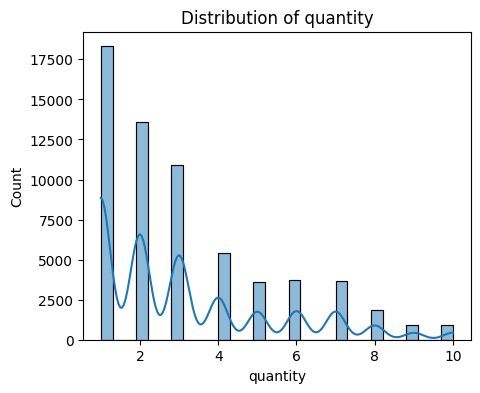

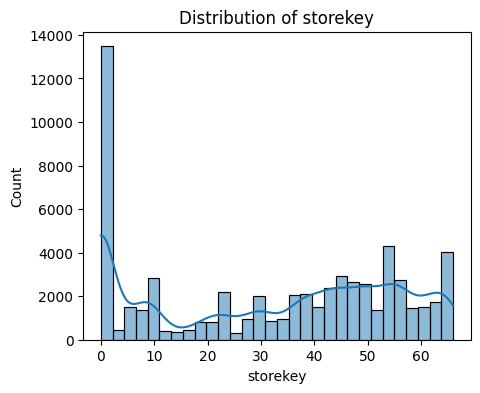

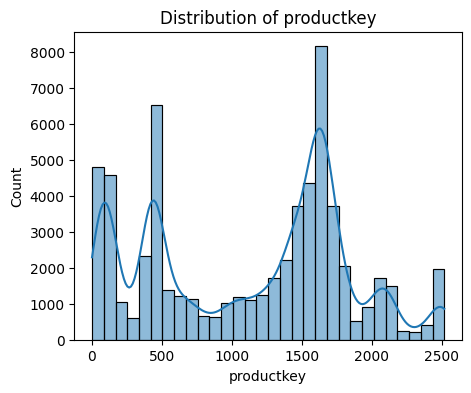

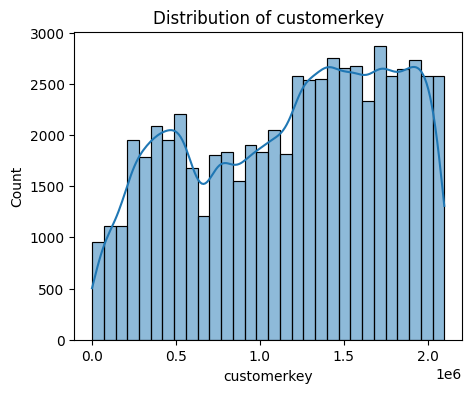

In [ ]:
# EDA for sales
numerical_features = ['quantity', 'storekey', 'productkey', 'customerkey']
for feature in numerical_features:
    plt.figure(figsize=(5, 4))
    sns.histplot(sales_df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

## Customers Dataset

In [ ]:
customers_df.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [ ]:
customers_df.columns = customers_df.columns.str.lower()
customers_df.columns = customers_df.columns.str.replace(' ','_')

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customerkey  15266 non-null  int64 
 1   gender       15266 non-null  object
 2   name         15266 non-null  object
 3   city         15266 non-null  object
 4   state_code   15256 non-null  object
 5   state        15266 non-null  object
 6   zip_code     15266 non-null  object
 7   country      15266 non-null  object
 8   continent    15266 non-null  object
 9   birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
customers_df.isnull().sum()

,0
customerkey,0
gender,0
name,0
city,0
state_code,10
state,0
zip_code,0
country,0
continent,0
birthday,0


In [ ]:
# Removing Unwanted Columns
#customers_df.drop(['state_code','zip_code'], axis=1, inplace=True)

In [ ]:
customers_df.duplicated().sum()

0

In [ ]:
# Changing Birthday dtype to datetime format
customers_df['birthday'] = pd.to_datetime(customers_df['birthday'],format="%m/%d/%Y")

In [ ]:
customers_df.birthday.dtype

dtype('<M8[ns]')

In [ ]:
age = 2023 - customers_df['birthday'].dt.year
customers_df['age'] = age

In [ ]:
customers_df.head()

,customerkey,gender,name,city,state_code,state,zip_code,country,continent,birthday,age
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03,84
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27,44
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26,76
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17,66
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19,58


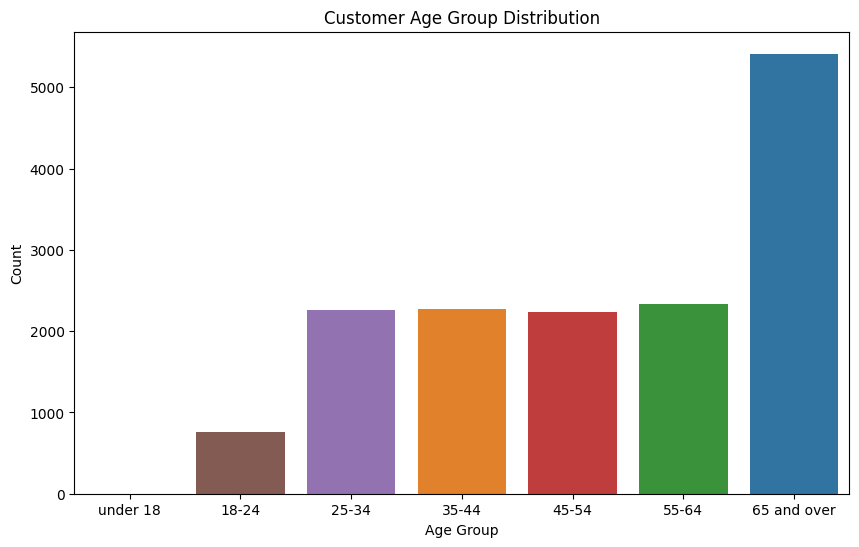

In [ ]:
def age_group(age):
    if age < 18:
        return 'under 18'
    elif 18 <= age <= 24:
        return '18-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    elif 45 <= age <= 54:
        return '45-54'
    elif 55 <= age <= 64:
        return '55-64'
    else:
        return '65 and over'
customers_df['age_group'] = customers_df['age'].apply(age_group)

# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', data=customers_df, order=['under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65 and over'],hue = 'age_group')
plt.title('Customer Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


Text(0.5, 1.0, 'Counts as per Country')

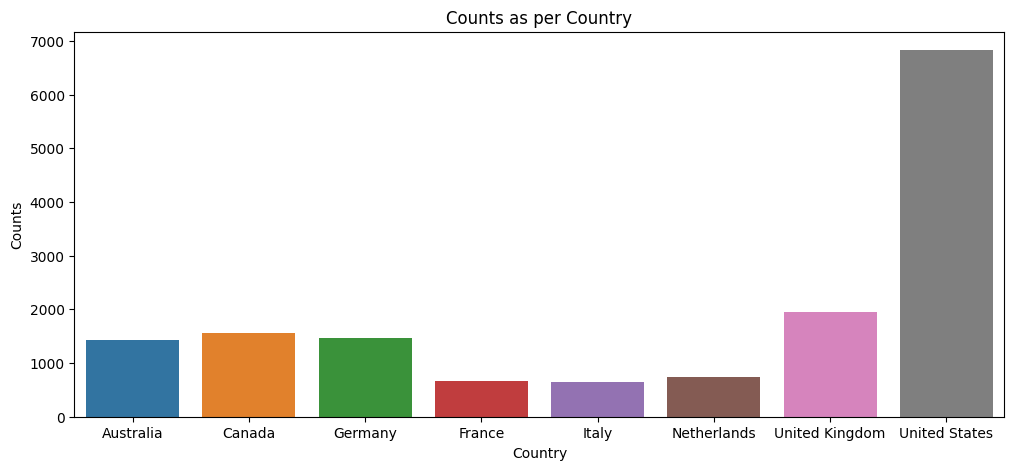

In [ ]:
# EDA for Customers data

plt.figure(figsize=(12,5))
sns.countplot(x= customers_df["country"],data=customers_df,hue="country")
plt.xlabel("Country")
plt.ylabel("Counts")
plt.title("Counts as per Country")

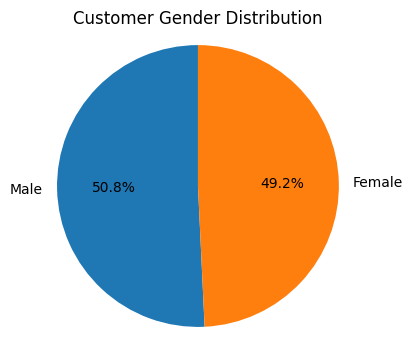

In [ ]:
gender_counts = customers_df['gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Customer Gender Distribution')
plt.axis('equal')
plt.show()

gender
Male      7748
Female    7518
Name: count, dtype: int64


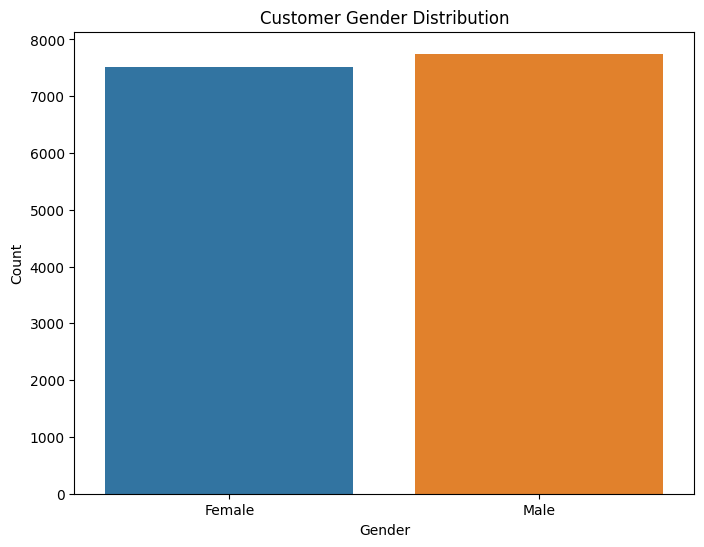

In [ ]:
print(customers_df.gender.value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=customers_df,hue='gender')
plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
customers_df.drop(['state_code','zip_code','birthday','age_group','name'], axis=1, inplace=True)

In [ ]:
customers_df.isnull().sum()

,0
customerkey,0
gender,0
city,0
state,0
country,0
continent,0
age,0


## Products Datasets

In [ ]:
products_df.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [ ]:
products_df.columns = products_df.columns.str.lower()
products_df.columns = products_df.columns.str.replace(' ','_')

In [ ]:
products_df.isnull().sum()

,0
productkey,0
product_name,0
brand,0
color,0
unit_cost_usd,0
unit_price_usd,0
subcategorykey,0
subcategory,0
categorykey,0
category,0


In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   productkey      2517 non-null   int64 
 1   product_name    2517 non-null   object
 2   brand           2517 non-null   object
 3   color           2517 non-null   object
 4   unit_cost_usd   2517 non-null   object
 5   unit_price_usd  2517 non-null   object
 6   subcategorykey  2517 non-null   int64 
 7   subcategory     2517 non-null   object
 8   categorykey     2517 non-null   int64 
 9   category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [ ]:
products_df.isnull().sum()

,0
productkey,0
product_name,0
brand,0
color,0
unit_cost_usd,0
unit_price_usd,0
subcategorykey,0
subcategory,0
categorykey,0
category,0


In [ ]:
products_df['unit_cost_usd'] = products_df['unit_cost_usd'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)
products_df['unit_price_usd'] = products_df['unit_price_usd'].str.replace('$', '').str.replace(",", "").str.strip().astype(float)

In [ ]:
products_df.head()

,productkey,product_name,brand,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [ ]:
products_df.duplicated().sum()

0

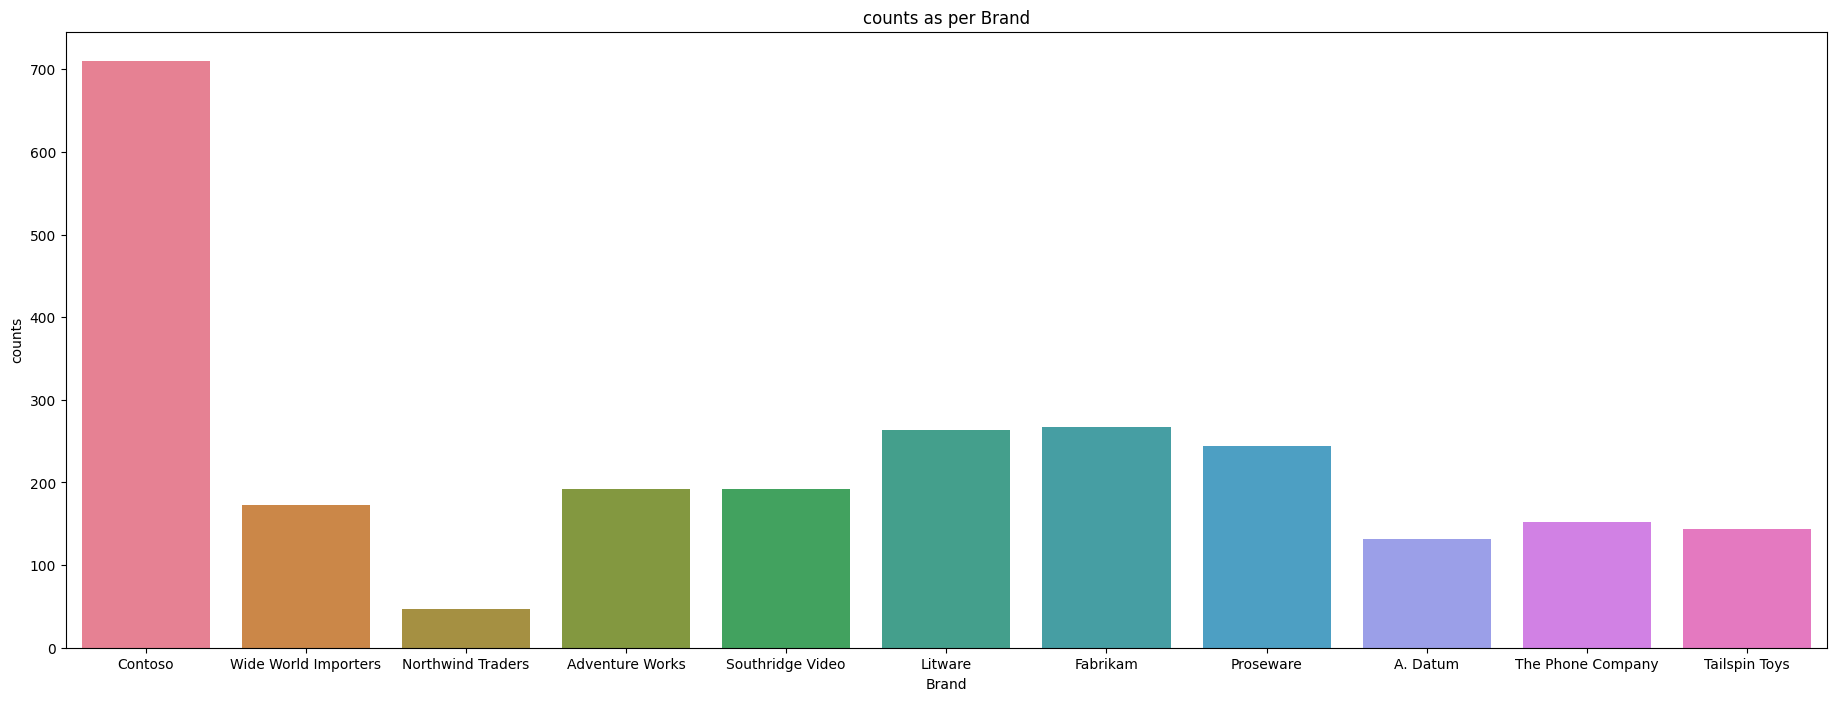

In [ ]:
# EDA for products_df
plt.figure(figsize=(50,8))
plt.subplot(1,2,1)
sns.countplot(x=products_df["brand"],data=products_df,hue="brand")
plt.xlabel("Brand")
plt.ylabel("counts")
plt.title("counts as per Brand")
plt.show()

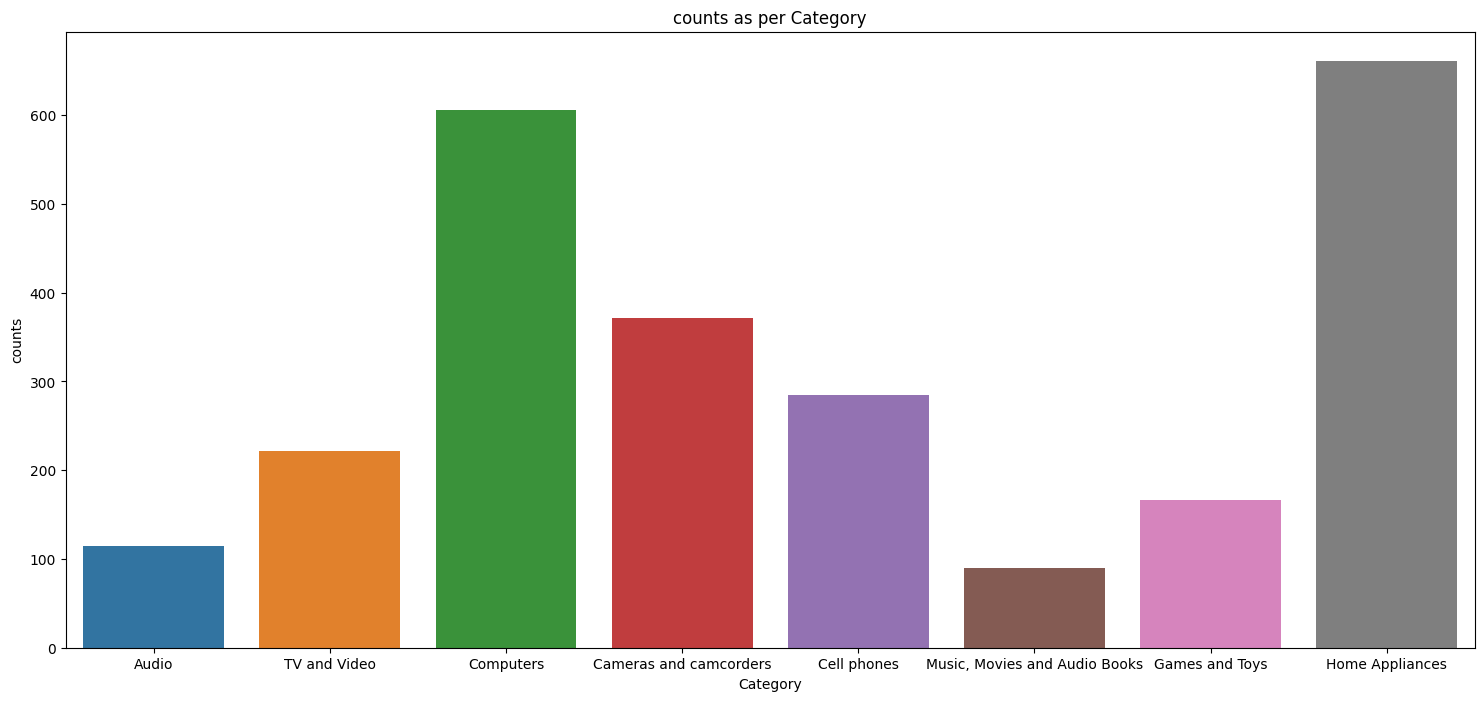

In [ ]:
plt.figure(figsize=(40,8))
plt.subplot(1,2,2)
sns.countplot(x=products_df["category"],data=products_df,hue="category")
plt.xlabel("Category")
plt.ylabel("counts")
plt.title("counts as per Category")
plt.show()

## Store Dataset

In [ ]:
store_df.head()

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015


In [ ]:
store_df.columns = store_df.columns.str.lower()
store_df.columns = store_df.columns.str.replace(' ','_')

In [ ]:
store_df.isnull().sum()

,0
storekey,0
country,0
state,0
square_meters,1
open_date,0


In [ ]:
# prompt: show me nan values in squaremeters

import pandas as pd

# Assuming 'store_df' is already loaded as in your provided code
nan_square_meters = store_df[store_df['square_meters'].isnull()]
nan_square_meters


,storekey,country,state,square_meters,open_date
66,0,Online,Online,NaN,1/1/2010


In [ ]:
# prompt: fill that nan value with 0

store_df['square_meters'].fillna(0, inplace=True)


In [ ]:
store_df.isnull().sum()


,0
storekey,0
country,0
state,0
square_meters,0
open_date,0


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   storekey       67 non-null     int64  
 1   country        67 non-null     object 
 2   state          67 non-null     object 
 3   square_meters  67 non-null     float64
 4   open_date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [ ]:
# Convert 'Open Date' to datetime objects
store_df['open_date'] = pd.to_datetime(store_df['open_date'])

In [ ]:
store_df.fillna(0)

,storekey,country,state,square_meters,open_date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [ ]:
store_df.duplicated().sum()

0

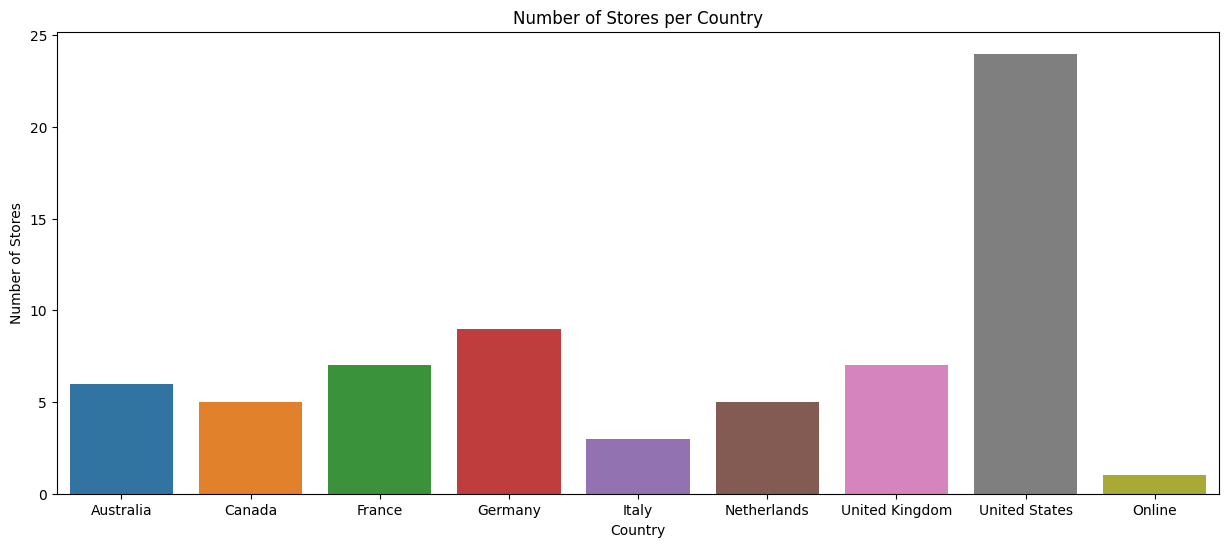

In [ ]:
# EDA for store_df based on store counts and country
plt.figure(figsize=(15, 6))
sns.countplot(x='country', data=store_df, hue='country')
plt.title('Number of Stores per Country')
plt.xlabel('Country')
plt.ylabel('Number of Stores')
plt.show()

# Calculate the number of stores per country
store_counts = store_df['country'].value_counts().reset_index()
store_counts.columns = ['country', 'storescount']  # Rename columns

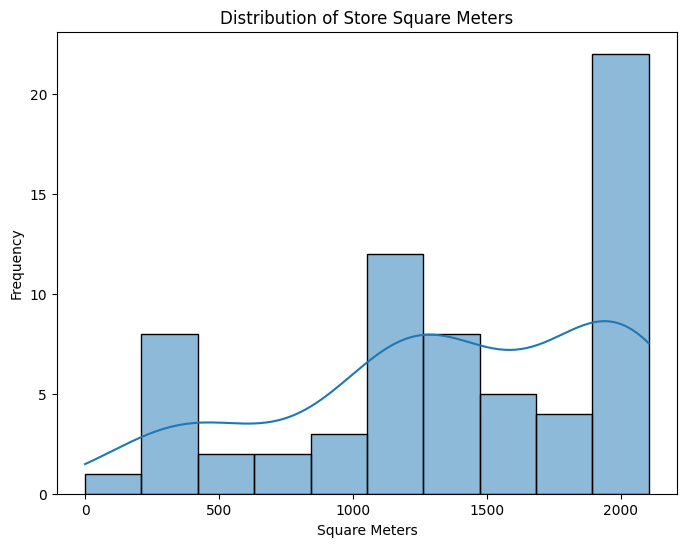

In [ ]:
# Histogram of Square Meter
plt.figure(figsize=(8, 6))
sns.histplot(store_df['square_meters'], bins=10, kde=True)  # Adjust bins as needed
plt.title('Distribution of Store Square Meters')
plt.xlabel('Square Meters')
plt.ylabel('Frequency')
plt.show()


## Exchange_Rates

In [ ]:
exchange_rates_df.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [ ]:
exchange_rates_df.columns = exchange_rates_df.columns.str.lower()
exchange_rates_df.columns = exchange_rates_df.columns.str.replace(' ','_')

In [ ]:
exchange_rates_df.isnull().sum()

,0
date,0
currency,0
exchange,0


In [ ]:
exchange_rates_df.shape

(11215, 3)

In [ ]:
exchange_rates_df['date'] = pd.to_datetime(exchange_rates_df['date'])

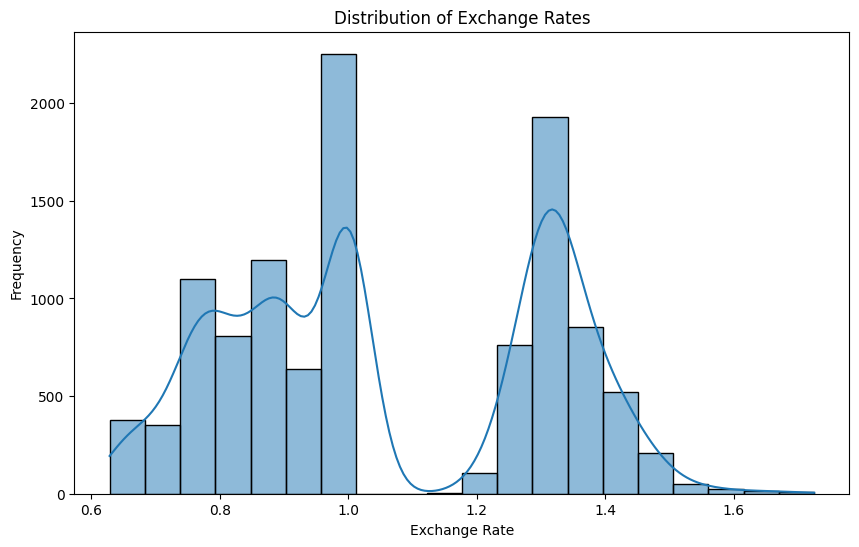

In [ ]:
# Visualize the distribution of 'Exchange' rates
plt.figure(figsize=(10, 6))
sns.histplot(exchange_rates_df['exchange'], bins=20, kde=True)
plt.title('Distribution of Exchange Rates')
plt.xlabel('Exchange Rate')
plt.ylabel('Frequency')
plt.show()

# Storing it as Cleaned dataset

In [ ]:
products_df.head()

,productkey,product_name,brand,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio


In [ ]:
customers_df.to_csv('/content/drive/MyDrive/Project/2.DataSpark/Cleaned_Csv/Customers.csv', index=False)
sales_df.to_csv('/content/drive/MyDrive/Project/2.DataSpark/Cleaned_Csv/Sales.csv', index=False)
products_df.to_csv('/content/drive/MyDrive/Project/2.DataSpark/Cleaned_Csv/Products.csv', index=False)
store_df.to_csv('/content/drive/MyDrive/Project/2.DataSpark/Cleaned_Csv/Stores.csv', index=False)
exchange_rates_df.to_csv('/content/drive/MyDrive/Project/2.DataSpark/Cleaned_Csv/Exchange_Rates.csv', index=False)

# Merging All the Cleaned Dataset

In [ ]:
merged_df = pd.merge(sales_df, customers_df, on='customerkey', how='left')


In [ ]:
merged_df= pd.merge(merged_df, products_df, on='productkey', how='left')

In [ ]:
merged_df = pd.merge(merged_df, store_df, on='storekey', how='left')

In [ ]:
merged_df = pd.merge(merged_df,exchange_rates_df,left_on=['order_date', 'currency_code'],right_on=['date', 'currency'],how='left')

In [ ]:
merged_df

,order_number,line_item,order_date,customerkey,storekey,productkey,quantity,currency_code,gender,city,state_x,country_x,continent,age,product_name,brand,color,unit_cost_usd,unit_price_usd,subcategorykey,subcategory,categorykey,category,country_y,state_y,square_meters,open_date,date,currency,exchange
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Male,London,Ontario,Canada,North America,52,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,2015-04-04,2016-01-01,CAD,1.3884
1,366001,1,2016-01-01,1269051,0,1048,2,USD,Male,Auberry,California,United States,North America,28,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,0.0,2010-01-01,2016-01-01,USD,1.0000
2,366001,2,2016-01-01,1269051,0,2007,1,USD,Male,Auberry,California,United States,North America,28,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,Online,Online,0.0,2010-01-01,2016-01-01,USD,1.0000
3,366002,1,2016-01-01,266019,0,1106,7,CAD,Female,Red Deer,Alberta,Canada,North America,61,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,0.0,2010-01-01,2016-01-01,CAD,1.3884
4,366002,2,2016-01-01,266019,0,373,1,CAD,Female,Red Deer,Alberta,Canada,North America,61,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,Online,Online,0.0,2010-01-01,2016-01-01,CAD,1.3884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD,Male,Garden Grove,California,United States,North America,84,WWI Screen 85in E1010 White,Wide World Importers,White,70.87,139.00,305,Projectors & Screens,3,Computers,United States,Alaska,1190.0,2015-01-01,2021-02-20,USD,1.0000
62880,2243031,1,2021-02-20,511229,0,98,4,EUR,Female,Stuttgart Frauenkopf,Baden-Württemberg,Germany,Europe,83,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,55.18,120.00,106,Bluetooth Headphones,1,Audio,Online,Online,0.0,2010-01-01,2021-02-20,EUR,0.8238
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD,Male,Calgary,Alberta,Canada,North America,30,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books",Online,Online,0.0,2010-01-01,2021-02-20,CAD,1.2610
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD,Male,Calgary,Alberta,Canada,North America,30,MGS Flight Simulator X M250,Tailspin Toys,Pink,32.25,70.13,702,Download Games,7,Games and Toys,Online,Online,0.0,2010-01-01,2021-02-20,CAD,1.2610


In [ ]:
merged_df.duplicated().sum()

0

In [ ]:
merged_df.columns

Index(['order_number', 'line_item', 'order_date', 'customerkey', 'storekey',
       'productkey', 'quantity', 'currency_code', 'gender', 'city', 'state_x',
       'country_x', 'continent', 'age', 'product_name', 'brand', 'color',
       'unit_cost_usd', 'unit_price_usd', 'subcategorykey', 'subcategory',
       'categorykey', 'category', 'country_y', 'state_y', 'square_meters',
       'open_date', 'date', 'currency', 'exchange'],
      dtype='object')

In [ ]:
merged_df.rename(columns={'city': 'customers_city'}, inplace=True)
merged_df.rename(columns={'state_x': 'customers_state'}, inplace=True)
merged_df.rename(columns={'country_x': 'customers_country'}, inplace=True)
merged_df.rename(columns={'continent': 'customers_continent'}, inplace=True)
merged_df.rename(columns={'unit_cost_usd': '_unit_cost_usd_'}, inplace=True)
merged_df.rename(columns={'unit_price_usd': '_unit_price_usd_'}, inplace=True)


In [ ]:
merged_df.rename(columns={'city': 'store_city'}, inplace=True)
merged_df.rename(columns={'state_y': 'store_state'}, inplace=True)
merged_df.rename(columns={'country_y': 'store_country'}, inplace=True)

In [ ]:
merged_df.columns

Index(['order_number', 'line_item', 'order_date', 'customerkey', 'storekey',
       'productkey', 'quantity', 'currency_code', 'gender', 'customers_city',
       'customers_state', 'customers_country', 'customers_continent', 'age',
       'product_name', 'brand', 'color', '_unit_cost_usd_', '_unit_price_usd_',
       'subcategorykey', 'subcategory', 'categorykey', 'category',
       'store_country', 'store_state', 'square_meters', 'open_date', 'date',
       'currency', 'exchange'],
      dtype='object')

In [ ]:
merged_df[['currency_code', 'currency']]

,currency_code,currency
0,CAD,CAD
1,USD,USD
2,USD,USD
3,CAD,CAD
4,CAD,CAD
...,...,...
62879,USD,USD
62880,EUR,EUR
62881,CAD,CAD
62882,CAD,CAD


In [ ]:
merged_df[['order_date','date']]

,order_date,date
0,2016-01-01,2016-01-01
1,2016-01-01,2016-01-01
2,2016-01-01,2016-01-01
3,2016-01-01,2016-01-01
4,2016-01-01,2016-01-01
...,...,...
62879,2021-02-20,2021-02-20
62880,2021-02-20,2021-02-20
62881,2021-02-20,2021-02-20
62882,2021-02-20,2021-02-20


In [ ]:
merged_df.drop(['date'], axis=1, inplace=True)
merged_df.drop(['currency'],axis=1, inplace=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_number         62884 non-null  int64         
 1   line_item            62884 non-null  int64         
 2   order_date           62884 non-null  datetime64[ns]
 3   customerkey          62884 non-null  int64         
 4   storekey             62884 non-null  int64         
 5   productkey           62884 non-null  int64         
 6   quantity             62884 non-null  int64         
 7   currency_code        62884 non-null  object        
 8   gender               62884 non-null  object        
 9   customers_city       62884 non-null  object        
 10  customers_state      62884 non-null  object        
 11  customers_country    62884 non-null  object        
 12  customers_continent  62884 non-null  object        
 13  age                  62884 non-

In [ ]:
merged_df.isnull().sum()

,0
order_number,0
line_item,0
order_date,0
customerkey,0
storekey,0
productkey,0
quantity,0
currency_code,0
gender,0
customers_city,0


In [ ]:
merged_df.to_csv('/content/drive/MyDrive/Project/2.DataSpark/Merged_df.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Project/2.DataSpark/Merged_df.csv')

In [ ]:
df

,order_number,line_item,order_date,customerkey,storekey,productkey,quantity,currency_code,gender,customers_city,customers_state,customers_country,customers_continent,age,product_name,brand,color,_unit_cost_usd_,_unit_price_usd_,subcategorykey,subcategory,categorykey,category,store_country,store_state,square_meters,open_date,exchange
0,366000,1,2016-01-01,265598,10,1304,1,CAD,Male,London,Ontario,Canada,North America,52,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,Canada,Nunavut,1210.0,2015-04-04,1.3884
1,366001,1,2016-01-01,1269051,0,1048,2,USD,Male,Auberry,California,United States,North America,28,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,0.0,2010-01-01,1.0000
2,366001,2,2016-01-01,1269051,0,2007,1,USD,Male,Auberry,California,United States,North America,28,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,Online,Online,0.0,2010-01-01,1.0000
3,366002,1,2016-01-01,266019,0,1106,7,CAD,Female,Red Deer,Alberta,Canada,North America,61,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,Online,Online,0.0,2010-01-01,1.3884
4,366002,2,2016-01-01,266019,0,373,1,CAD,Female,Red Deer,Alberta,Canada,North America,61,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,Online,Online,0.0,2010-01-01,1.3884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,1216913,43,632,3,USD,Male,Garden Grove,California,United States,North America,84,WWI Screen 85in E1010 White,Wide World Importers,White,70.87,139.00,305,Projectors & Screens,3,Computers,United States,Alaska,1190.0,2015-01-01,1.0000
62880,2243031,1,2021-02-20,511229,0,98,4,EUR,Female,Stuttgart Frauenkopf,Baden-Württemberg,Germany,Europe,83,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,55.18,120.00,106,Bluetooth Headphones,1,Audio,Online,Online,0.0,2010-01-01,0.8238
62881,2243032,1,2021-02-20,331277,0,1613,2,CAD,Male,Calgary,Alberta,Canada,North America,30,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books",Online,Online,0.0,2010-01-01,1.2610
62882,2243032,2,2021-02-20,331277,0,1717,2,CAD,Male,Calgary,Alberta,Canada,North America,30,MGS Flight Simulator X M250,Tailspin Toys,Pink,32.25,70.13,702,Download Games,7,Games and Toys,Online,Online,0.0,2010-01-01,1.2610


In [ ]:
df.duplicated().sum()

0

In [ ]:
male_customer_count = df[df['gender'] == 'Male']['customerkey'].nunique()
print(f"Number of unique male customers: {male_customer_count}")

Number of unique male customers: 6029


In [ ]:
import mysql.connector
import pandas as pd

# Assuming you have already established a connection to your MySQL database
# and have the 'mydb' and 'my_cursor' objects as defined in your previous code.

# Replace 'your_table_name' with the desired table name in your MySQL database
table_name = 'merged_data'

# Create the table if it doesn't exist
my_cursor.execute(f'''
    CREATE TABLE IF NOT EXISTS {table_name} (
        -- Define your column names and data types here, matching the merged_df columns
        orderkey INT,
        order_date DATE,
        quantity INT,
        sales FLOAT,
        discount FLOAT,
        profit FLOAT,
        customerkey INT,
        productkey INT,
        storekey INT,
        gender VARCHAR(255),
        customers_city VARCHAR(255),
        customers_state VARCHAR(255),
        customers_country VARCHAR(255),
        customers_continent VARCHAR(255),
        age INT,
        product_name VARCHAR(255),
        brand VARCHAR(255),
        category VARCHAR(255),
        _unit_cost_usd_ FLOAT,
        _unit_price_usd_ FLOAT,
        store_city VARCHAR(255),
        store_state VARCHAR(255),
        store_country VARCHAR(255),
        square_meters FLOAT,
        open_date DATE,
        currency_code VARCHAR(255),
        exchange FLOAT
        -- Add other columns from your merged_df as needed
    )
''')
print("Table Created successfully")


# Read the merged DataFrame
df = pd.read_csv('/content/drive/MyDrive/Project/2.DataSpark/Merged_df.csv')

# Prepare data for insertion
data = df.values.tolist()
insert_query = f'''
    INSERT INTO {table_name} (
        orderkey, order_date, quantity, sales, discount, profit, customerkey, productkey, storekey, gender, customers_city,
        customers_state, customers_country, customers_continent, age, product_name, brand, category, _unit_cost_usd_,
        _unit_price_usd_, store_city, store_state, store_country, square_meters, open_date, currency_code, exchange
        -- Add column names corresponding to your table schema
    ) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)
'''

# Function to reconnect to the database if the connection is lost
def reconnect():
    global mydb, my_cursor
    mydb.reconnect()
    my_cursor = mydb.cursor()

batch_size = 1000  # Adjust as needed

for i in range(0, len(data), batch_size):
    batch_data = data[i : i + batch_size]
    try:
        my_cursor.executemany(insert_query, batch_data)
        mydb.commit()
    except mysql.connector.Error as err:
        if err.errno == mysql.connector.errorcode.CR_SERVER_LOST or err.errno == mysql.connector.errorcode.CR_SERVER_GONE_ERROR:
            reconnect()
            my_cursor.executemany(insert_query, batch_data)
            mydb.commit()

print("Inserted successfully")
